# Lab 1 : Source coding

### Question 1

Écrivons un programme estimant l'entropie d'un vecteur de données binaires.

Commençons par définir une fonction définissant l'entropie d'un ensemble de probabilités :

In [9]:
from math import log

def H(A) :
	#au cas où la proba serait nulle, on lui rajoute un epsilon pour faciliter le calcul du log (log(0) n'existe pas)
	for i in range(len(A)) :
		A[i] += 10**(-15)
	return -(sum(A[i]*log(A[i], 2.0) for i in range(len(A))))

On peut maintenant coder la fonction demandée. Cette fonction commence par transformer le vecteur en ensemble de probabilités, puis retourne l'entropie de cet ensemble :

In [10]:
def entropy(data) :
	probas = [0, 0]
	for i in range(len(data)) :
		probas[data[i]] += 1
	for i in range(len(probas)) :
		probas[i] = probas[i]/len(data)
	return H(probas)

### Question 2

On construit un vecteur contenant des bits indépendants et équiprobables ; il va s'agir d'un vecteur de 100 bits, contenant 50 "0" et 50 "1" :

In [16]:
data = [0]*50+[1]*50

On vérifie que l'entropie de ce vecteur est bien égale à 1 :

In [17]:
print(entropy(data))

0.9999999999999991


### Question 3

Dessinons les variations de l'entropie en fonction de P(X=0) (i.e. en fonction de la proportion de "0" se trouvant dans le vecteur dont on veut calculer l'entropie).

Pour chaque valeur de P(X=0), plutôt que de créer un vecteur de données tel que la proportion de "0" qui s'y trouve soit égale à P(X=0), on calcule directement H(\[P(X=0), 1-P(X=0)\]), ce qui est plus rapide et moins fastidieux.

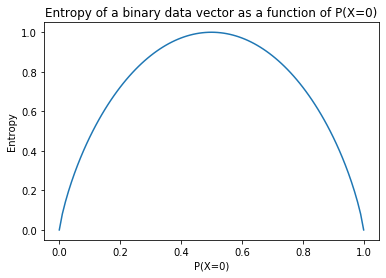

In [6]:
import matplotlib.pyplot as plt

X, Y = [], []
for alpha in range(101) :
    p = float(alpha)/100.0
    X.append(p)
    Y.append(H([p, 1-p]))
plt.title("Entropy of a binary data vector as a function of P(X=0)")
plt.plot(X, Y)
plt.xlabel("P(X=0)")
plt.ylabel("Entropy")
plt.show()

### Question 4

On considère une source discrète avec mémoire, utilisant un alphabet de données binaires et produisant séquentiellement des symboles $x_1, x_2, ... , x_n$, indicés dans le temps. On note $A$ l'ensemble de toutes les réalisations possibles de ces symboles.

L'entropie d'une telle source se calcule de la façon suivante, en prenant en compte l'ordre $p$ de son effet de mémoire :

$$H(x_k) = \sum_{A} H(x_k | x_{k-1}, x_{k-2}, ..., x_{k-p}) \times p(x_{k-1}, x_{k-2}, ..., x_{k-p}) $$

On se place dans le cas d'une chaîne de Markov, dont l'ordre de l'effet de mémoire est $p=1$. On définit sa matrice de transition :

$$ \mathbf{\Pi} = 
\begin{bmatrix}
    p(x_k = 0 | x_{k-1} = 0) & p(x_k = 1 | x_{k-1} = 0) \\
    p(x_k = 0 | x_{k-1} = 1) & p(x_k = 1 | x_{k-1} = 1)
\end{bmatrix}
=
\begin{bmatrix}
    p_{00} & p_{10} \\
    p_{01} & p_{11}
\end{bmatrix}
$$

De plus, on suppose que cette chaîne de Markov est stationnaire, i.e. pour $\mathbf{P} = 
\begin{bmatrix}
    p_0 & p_1
\end{bmatrix}$ on vérifie que $\mathbf{P} \mathbf{\Pi} = \mathbf{P}$.

Calculons $p_0$ et $p_1$ en fonction de $p_{00}$ et $p_{01}$ :

$$\mathbf{P} = \mathbf{P} \mathbf{\Pi} $$

$$\Rightarrow
\begin{bmatrix}
    p_0 & p_1
\end{bmatrix}
=
\begin{bmatrix}
    p_{00} & p_{10} \\
    p_{01} & p_{11}
\end{bmatrix}
\times
\begin{bmatrix}
    p_0 & p_1
\end{bmatrix}
$$

$$\Rightarrow
\left \{
\begin{matrix}
    p_0 = p_0 p_{00} + p_1 p_{01} \\ 
    p_1 = p_0 p_{10} + p_1 p_{11}
\end{matrix}
\right .
$$

$$\Rightarrow
\left \{
\begin{matrix}
    p_0 = p_0 p_{00} + ( 1 - p_1 ) p_{01} \\ 
    p_1 = 1 - p_0
\end{matrix}
\right .
$$

$$\Rightarrow
\left \{
\begin{matrix}
    p_0 (1 - p_{00} + p_{01}) =  p_{01} \\ 
    p_1 = 1 - p_0
\end{matrix}
\right .
$$

$$\Rightarrow
\left \{
\begin{matrix}
    p_0 = \frac{p_{01}}{1 - p_{00} + p_{01}} \\ 
    p_1 = \frac{1 - p_{00}}{1 - p_{00} + p_{01}}
\end{matrix}
\right .
$$

$$CQFD.$$

On en déduit l'expression de l'entropie de cette source :

$$ H(x_k) = \sum_{A} H(x_k | x_{k-1}, x_{k-2}, ..., x_{k-p}) \times p(x_{k-1}, x_{k-2}, ..., x_{k-p}) $$
$$ H(x_k) = \sum_{A} H(x_k | x_{k-1}) \times p(x_{k-1}) $$
$$ H(x_k) = H(x_k | x_{k-1} = 0) \times p_0 + H(x_k | x_{k-1} = 1) \times p_1 $$

$$ H(x_k) = -p(x_k = 0 | x_{k-1} = 0) \times \log_2(p(x_k = 0 | x_{k-1} = 0)) \times p_0
-p(x_k = 1 | x_{k-1} = 0) \times \log_2(p(x_k = 1 | x_{k-1} = 0)) \times p_0 $$
$$ -p(x_k = 0 | x_{k-1} = 1) \times \log_2(p(x_k = 0 | x_{k-1} = 1)) \times p_1
-p(x_k = 1 | x_{k-1} = 1) \times \log_2(p(x_k = 1 | x_{k-1} = 1)) \times p_1 $$

$$ H(x_k) = -(p_{00} \log_2(p_{00}) + p_{10} \log_2(p_{10})) \times p_0
-(p_{01} \log_2(p_{01}) + p_{11} \log_2(p_{11})) \times p_1 $$

$$CQFD.$$

### Question 5

On considère maintenant l'image "scan.png", composée uniquement de pixels noirs et blancs : elle peut donc être facilement convertie en suite de "0" et de "1". Récupérons cette suite et stockons-la dans la variable data :

In [19]:
from PIL import Image

data = []
im = Image.open('scan.png')
pix = im.load()
for x in range(im.size[0]):
    for y in range(im.size[1]):
        data.append(pix[x, y])

On peut calculer son volume théorique de trois manières différentes : en comptant le nombre de pixels, en multipliant l'entropie de cette suite par le nombre de pixels en considérant qu'il s'agit d'une source sans mémoire, ou en multipliant l'entropie de la source avec mémoire correspondant à cette suite par le nombre de pixels.

Ces volumes doivent s'approcher du volume pratique de l'image, qui est de 108 ko, soit 884 736 bits.

On calcule d'abord le nombre de pixels :

In [8]:
print(len(data))

8415000


Ce premier volume est environ 10 fois plus élevé que le volume pratique.

Calculons maintenant le produit de l'entropie de data par le nombre de pixels :

In [22]:
print(entropy(data)*len(data))

2384597.117440494


Ce volume est environ 3 fois plus élevé que le volume pratique.

Pour calculer l'entropie de la source avec mémoire correspondante, commençons par définir une fonction calculant l'entropie d'une suite de probabilités d'une source avec mémoire, prenant en paramètre l'ensemble de probabilités ainsi que la matrice de transition de la source :

In [24]:
def H_Markov(PI, A) :
	#au cas où la proba serait nulle, on lui rajoute un epsilon pour faciliter le calcul du log (log(0) n'existe pas !)
	for i in range(len(A)) :
		for j in range(len(A)) :
			PI[i][j] += 10**(-15)
	for i in range(len(A)) :
		A[i] += 10**(-15)
	return sum( -sum(PI[j][i]*log(PI[j][i], 2.0) for j in range(len(A)))*A[i] for i in range(len(A)))

On code maintenant une fonction calculant la matrice de transition de la source, transformant la source en vecteur de probabilités, et donnant l'entropie de ce vecteur :

In [25]:
def entropy_Markov(data) :
	PI = [[0, 0], [0, 0]] #[[P_00, P_01], [P_10, P_11]]
	probas = [0, 0]
	probas[data[0]] += 1
	for i in range(1, len(data)) :
		probas[data[i]] += 1
		PI[data[i]][data[i-1]] += 1
	for i in range(len(probas)) :
		for j in range(len(probas)) :
			PI[i][j] = PI[i][j]/probas[i]
	for i in range(len(probas)) :
		probas[i] = probas[i]/len(data)
	return H_Markov(PI, probas)

À partir de cette fonction, on calcule le troisième volume théorique, qui correspond au produit de la source avec mémoire correspondant à data par le nombre de pixels :

In [26]:
print(entropy_Markov(data)*len(data))

4030942.2564394777


Ce volume est environ 5 fois plus élevé que le volume pratique.

Le volume théorique s'approchant le plus du volume pratique est donc le produit de l'entropie de la source sans mémoire correspondant à l'image multiplié par le nombre de pixels de l'image.

### Question 6

Pour réduire le volume d'une telle suite de pixels, le codage RLE semble approprié. En effet, ce codage retourne un tableau à deux dimensions tel que, pour chaque ligne, le premier élément donne la valeur du pixel rencontré et le deuxième élément le nombre de fois d'affilé où ce pixel apparaît.

Définissons donc une fonction prenant en paramètre une suite de "0" et de "1" et retourne son codage RLE :

In [30]:
import numpy as np

def RLE(data):
    answer_list = []
    elem = data[0]
    count = 1
    for i in range(1, len(data)):
        if data[i] == elem :
            count += 1
        else :
            answer_list.append((elem, count))
            elem = data[i]
            count = 1
    answer_list.append((elem, count))
    return np.array(answer_list)

Le codage RLE de notre source de pixels est donc le suivant :

In [31]:
print(RLE(data))

[[      1  772413]
 [      0       1]
 [      1      35]
 ...
 [      1     736]
 [      0       2]
 [      1 1261384]]
